In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 25,8
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt

import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [15]:
term_horizon = 'long' # short , mid , long
datasets = 'UNVR' # GGRM , UNVR, PSDN
parameter_lstm = "e=100_u=128"
parameter_arima = "p=2_q=1"

data_lstm = pd.read_csv('../results/LSTM/datasets/' + term_horizon+ '/'+ datasets + '.jk_LSTM-' + term_horizon 
                        + '_'+ parameter_lstm +'.csv')
data_arima = pd.read_csv('../results/ARIMA/datasets/'+term_horizon+'/'+ datasets+ '.jk_ARIMA-' + term_horizon 
                        + '_'+ parameter_arima +'.csv')


In [16]:
data_arima.isnull().sum()

Date           0
real_close     0
close_arima    0
dtype: int64

In [17]:
data_lstm.isnull().sum()

Date          0
real_close    0
close_lstm    0
dtype: int64

In [18]:
# data_arima

In [19]:
# data_lstm

In [20]:
data_arima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         252 non-null    object 
 1   real_close   252 non-null    float64
 2   close_arima  252 non-null    float64
dtypes: float64(2), object(1)
memory usage: 6.0+ KB


In [21]:
data_lstm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        252 non-null    object 
 1   real_close  252 non-null    float64
 2   close_lstm  252 non-null    float64
dtypes: float64(2), object(1)
memory usage: 6.0+ KB


In [22]:
lstm_close = data_lstm['close_lstm']
arima_close = data_arima['close_arima']
real_close = data_arima['real_close']

date_time = data_arima['Date']
date_time = pd.to_datetime(date_time)

new_df = pd.DataFrame()
new_df['real_close'] = real_close
new_df['close_arima'] = arima_close
new_df['close_lstm'] = lstm_close
new_df = new_df.set_index(date_time)

In [23]:
# new_df

<Figure size 1800x576 with 0 Axes>

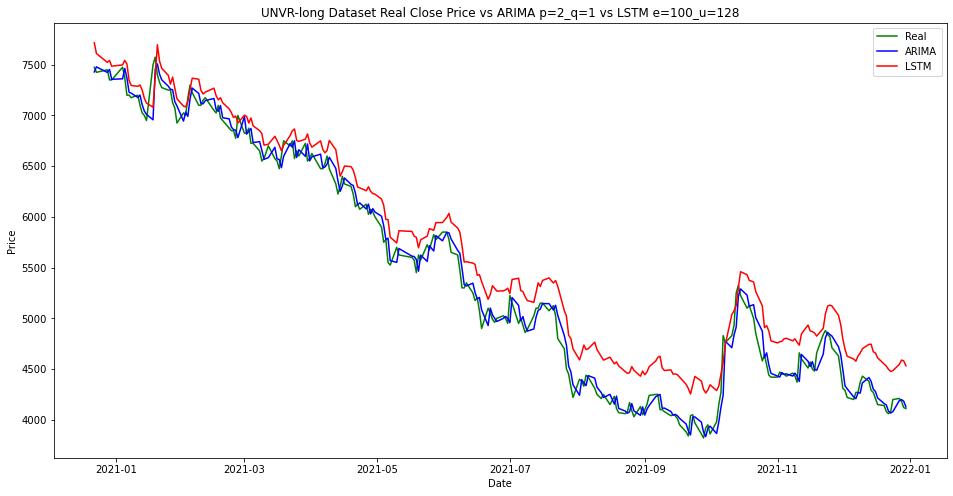

In [25]:
plt.figure()
plt.subplots(figsize=(16, 8))
plt.plot(new_df['real_close'], color = 'green', label = 'Real')
plt.plot(new_df['close_arima'], color = 'blue', label = 'ARIMA')
plt.plot(new_df['close_lstm'], color = 'red', label = 'LSTM')
plt.title(datasets+"-"+term_horizon+" Dataset Real Close Price vs ARIMA "+parameter_arima + " vs LSTM " + parameter_lstm)
plt.xlabel('Date')
plt.ylabel("Price")
plt.legend()
plt.savefig("../results/plots_arima_vs_lstm/"+datasets+"-"+term_horizon+" Dataset Real Close Price vs ARIMA vs LSTM.jpg")

# plt.savefig("../results/plots_arima_vs_lstm/"+datasets+"-"+term_horizon+" Dataset Real Close Price vs ARIMA "
#             +parameter_arima + " vs LSTM " + parameter_lstm+ '.jpg')


plt.show()